<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Demo Datasets/heart.csv')

In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'Age-Cholesterol plot')

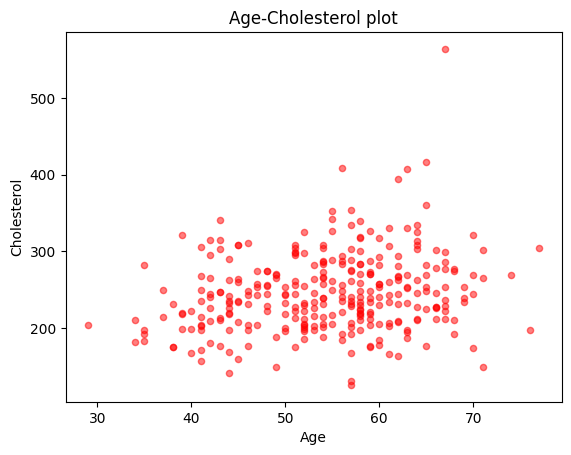

In [ ]:
df.plot(kind = 'scatter',x = 'age',y = 'chol', alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

In [ ]:
df_new = pd.get_dummies(df,columns = ['cp','thall'],drop_first = True)

In [ ]:
df_new.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,cp_1,cp_2,cp_3,thall_1,thall_2,thall_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,False,False,True,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,0,1,False,True,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,1,True,False,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,2,0,1,True,False,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,2,0,1,False,False,False,False,True,False


In [ ]:
x = df_new.drop('output', axis = 1)
y = df_new.output

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.model_selection import GridSearchCV

ml = svm.SVC()
para_grid = {'C': [1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001],'kernel':['rbf']}

grid = GridSearchCV(ml, para_grid, refit = True, verbose = 1, cv = 5, n_jobs = -1)

grid_search = grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
accuracy = grid_search.best_score_
accuracy

0.5946428571428571

In [ ]:
y_test_hat = grid.predict(x_test)

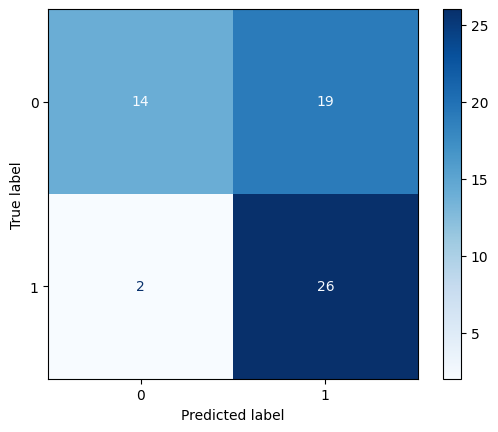

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=grid.classes_)
disp.plot(cmap = plt.cm.Blues , ax = plt.gca())
plt.show()

In [ ]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.58      0.93      0.71        28

    accuracy                           0.66        61
   macro avg       0.73      0.68      0.64        61
weighted avg       0.74      0.66      0.64        61

